In [49]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer

In [50]:
data = pd.read_csv('dataset.csv')

In [51]:
data.head()

,text,label
0,Product Name: Adjustable Strap Sports Bra nan ...,original
1,Product Name: Convertible Workout Pants nan na...,original
2,Product Name: Baseball Cap nan nan nan nan nan...,original
3,Product Name: Basketball Jersey nan nan nan na...,original
4,Product Name: Boxing Gloves nan nan nan nan na...,original


In [52]:
data.shape

(400, 2)

In [53]:
data['label'].value_counts()

original    250
similar     150
Name: label, dtype: int64

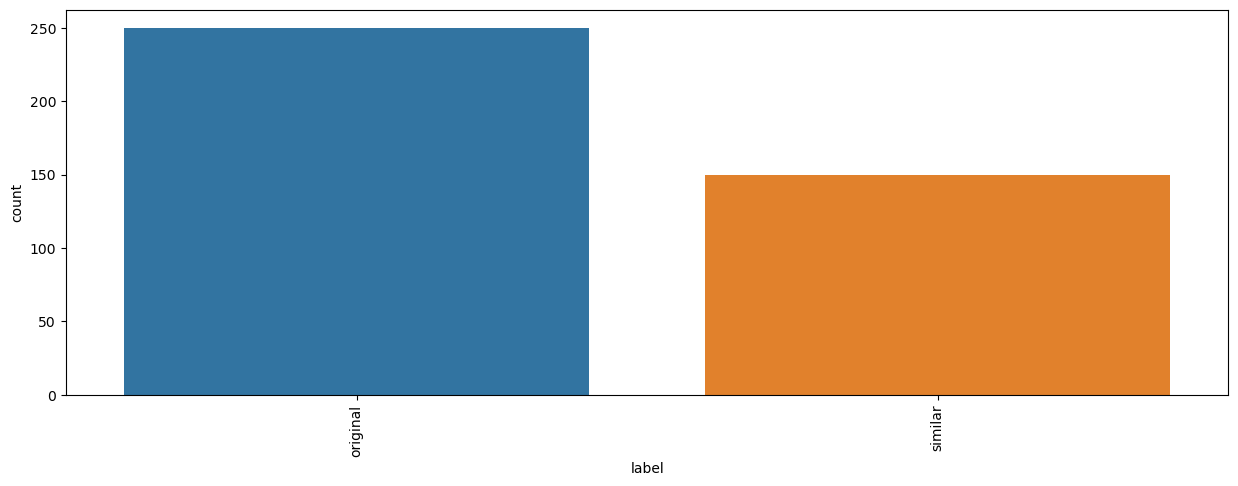

In [54]:
plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='label')
plt.xticks(rotation=90)
plt.show()

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    400 non-null    object
 1   label   400 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [56]:
data['text'] = data['text'].astype(str)

In [57]:
X = data.drop('label', axis=1)
y = data['label']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [60]:
text_clf = Pipeline([
...     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
...     ('tfidf', TfidfTransformer(use_idf=True)),
...     ('clf', SVC()),
... ])

In [61]:
text_clf.fit(X_train['text'].to_list(), list(y_train))

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()), ('clf', SVC())])

In [62]:
y_pred = text_clf.predict(X_test['text'].to_list())

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    original       0.62      1.00      0.77        50
     similar       0.00      0.00      0.00        30

    accuracy                           0.62        80
   macro avg       0.31      0.50      0.38        80
weighted avg       0.39      0.62      0.48        80



C:\Users\Kalana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kalana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kalana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
import pickle
pickle.dump(text_clf, open("model.dat", "wb"))

In [65]:
with open('model.dat' , 'rb') as f:
    model = pickle.load(f)

In [66]:
def predict(text):
    value = model.predict([text])
    return value[0]

In [111]:
def generate_prompt(row,text):
    full_text = ""
    
    for _, row in df.iterrows():
        task = row["Unnamed: 1"]
        measurement = row["Unnamed: 2"]
        machine = row["Unnamed: 3"]
        operator = row["Unnamed: 5"]
        quality_check = "This task undergoes a quality check." if row["Unnamed: 6"] == "Yes" else "This task does not undergo a quality check."
        remarks = row["Unnamed: 7"]

        prompt = (
            f"A {operator} is performing the task of '{task}'. "
            f"The materials involved measure {measurement}. "
            f"The operation uses a {machine}. "
            f"{quality_check} "
            f"Additional details: {remarks}.\n\n"
        )
        
        full_text = prompt
    
    return text+" "+full_text

In [114]:
df = pd.read_excel('Gym_Gloves_Cleaned.xlsx')
all_text = df.astype(str).values.flatten()
combined_text = ' '.join([item for item in all_text if item != ''])
df.columns = df.columns.str.strip()

In [115]:
df

,Operation Breakdown Report for Gym Gloves,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Product Name:,Gym Gloves,NaN,NaN,NaN,NaN,NaN,NaN
1,Brand:,Brand A,NaN,NaN,NaN,NaN,NaN,NaN
2,Style Number:,ST-7320,NaN,NaN,NaN,NaN,NaN,NaN
3,Size Range:,XL to XXL,NaN,NaN,NaN,NaN,NaN,NaN
4,Production Facility:,Facility 5 - Colombo,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Operation Description ID,Operation Description,Measurement/Details,Machine Used,Time (Minutes),Operator,Quality Check,Remarks
7,DF148690,Sew elastic.,25 x 39 cm,Fabric Cutter,6,Finisher,Yes,Check seam accuracy
8,DF250205,Cut elastic.,18 x 50 cm,Fabric Cutter,2,Cutter,Yes,Check seam accuracy
9,DF595004,Cut panels.,26 x 47 cm,Overlock Machine,10,Cutter,Yes,Check seam accuracy


In [110]:
print(generate_prompt(df,predict(combined_text)))

A Seamstress is performing the task of 'Sew fabric.'. The materials involved measure 12 x 50 cm. The operation uses a Fabric Cutter. This task does not undergo a quality check. Additional details: None.


